In [1]:
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def surfacetension(T):
    return((-1.55*1/10000*T)+0.118)

def A(T):
    sigma=surfacetension(T)
    Rv=461.5
    row_l=999.85
    j=(2*sigma)/(row_l*Rv*T)
    return j
    
def s_exp(r,T):
    return np.exp(A(T)/r)

def s_approx(r,T):
    return(1+(A(T)/r))

def s_error(r,T):
    M=s_exp(r,T)
    L=s_approx(r,T)
    error=(M-L)/M
    return error

In [3]:
def aw(r,rd,k):
    nominator= (r**3)-(rd**3)
    denominator=(r**3)-(rd**3*(1-k))
    return (nominator/denominator)

def aw_weak(r,rd,k):
    Bs=k*rd**3
    return(1-(Bs/(r**3)))

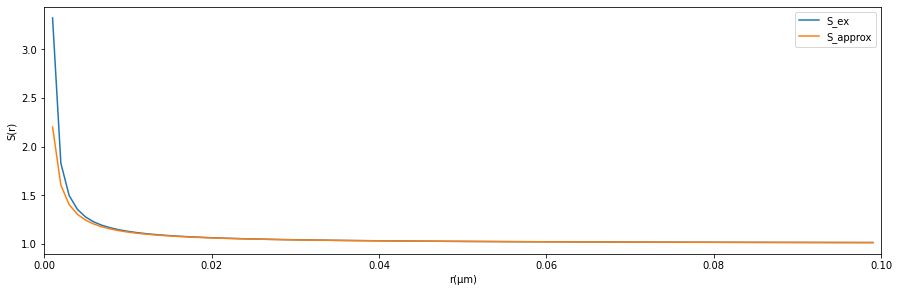

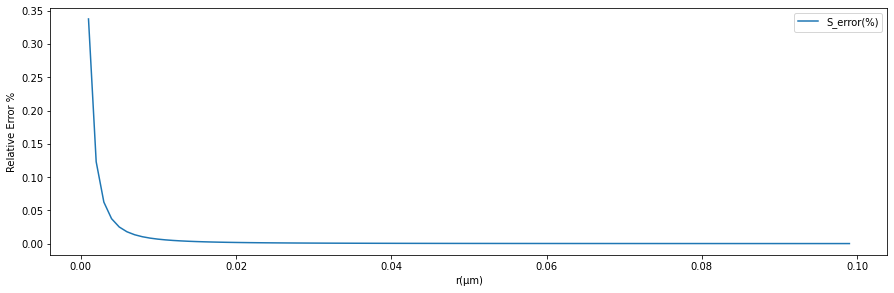

In [4]:
T=273.15
min_r=0.001E-6
max_r=0.1E-6
division=100
step=(max_r-min_r)/division
r=np.arange(min_r,max_r,step)
Sexp=s_exp(r,T)
Sapprox=s_approx(r,T)
plt.figure(figsize=(15,10 ))
plt.subplot(211)
plt.plot(r*1e6,Sexp,label="S_ex")
plt.plot(r*1e6,Sapprox,label="S_approx")
plt.xlim(0.00,0.1)
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.legend()
plt.show()
Serr_percent= s_error(r,T)
plt.figure(figsize=(15,10 ))
plt.subplot(211)
plt.plot(r*1e6,Serr_percent,label="S_error(%)")
plt.xlabel("r(\u03BCm)")
plt.ylabel("Relative Error %")
plt.legend()
plt.show()


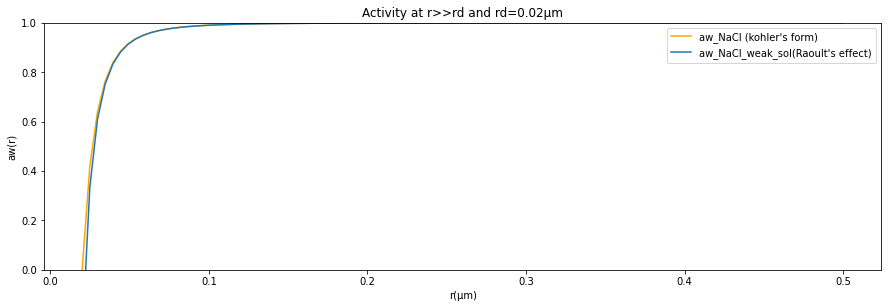

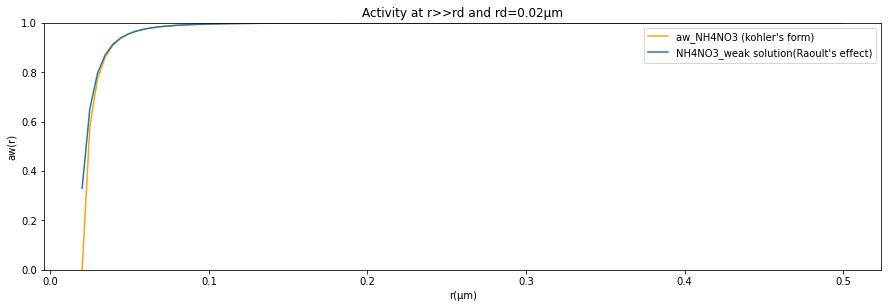

In [29]:
rmax=0.5
rmin=0.02
r1=np.linspace(rmin,rmax,100)
#for case where rd=0.02micrometer k1=1.28 Nacl and NH4NO3 k2=0.67 and r:{ 0.02e-6 m,2e-6 m }
rd=0.02
k1=1.28
k2=0.67
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Activity at r>>rd and rd=0.02\u03BCm")
aw1=aw(r1,rd,k1)
aw2=aw_weak(r1,rd,k1)
plt.plot(r1,aw1,"orange",label="aw_NaCl (kohler's form)")
plt.plot(r1,aw2,label="aw_NaCl_weak_sol(Raoult's effect)")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.ylim(0,1)
plt.legend()
plt.show()
plt.figure(figsize=(15,10))
plt.subplot(212)
plt.title("Activity at r>>rd and rd=0.02\u03BCm")
plt.plot(r1,aw(r1,rd,k2),"orange",label="aw_NH4NO3 (kohler's form)")
plt.plot(r1,aw_weak(r1,rd,k2),label="NH4NO3_weak solution(Raoult's effect)")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.ylim(0,1)
plt.legend()
plt.show()

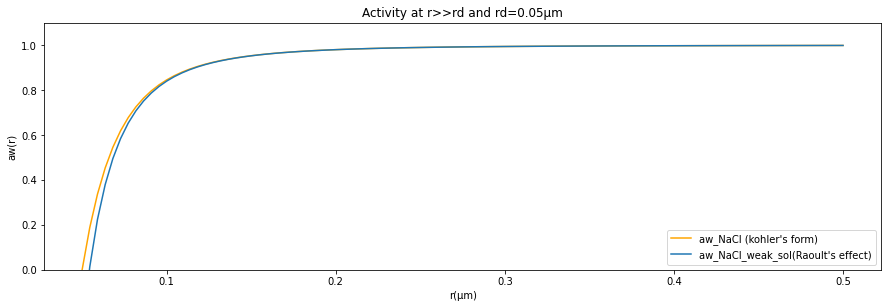

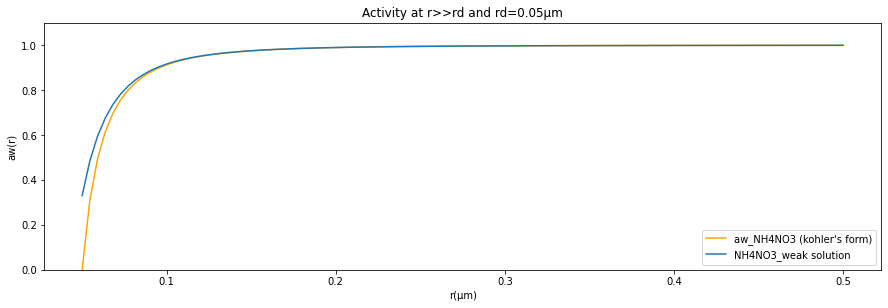

In [30]:
rmax2=0.5
rmin2=0.05
r2=np.linspace(rmin2,rmax2,100)
#for case where rd=0.05e-6 k1=1.28 Nacl and NH4NO3 k2=0.67 and r:{ 0.05e-6 m,2e-6 m }
rd2=0.05
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.ylim(0,1.1)
plt.title("Activity at r>>rd and rd=0.05\u03BCm")
aw1_1=aw(r2,rd2,k1)
aw2_2=aw_weak(r2,rd2,k1)
plt.plot(r2,aw1_1,"orange",label="aw_NaCl (kohler's form)")
plt.plot(r2,aw2_2,label="aw_NaCl_weak_sol(Raoult's effect)")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.legend()
plt.show()
plt.figure(figsize=(15,10))
plt.subplot(212)
plt.ylim(0,1.1)
plt.title("Activity at r>>rd and rd=0.05\u03BCm")
plt.plot(r2,aw(r2,rd2,k2),"orange",label="aw_NH4NO3 (kohler's form)")
plt.plot(r2,aw_weak(r2,rd2,k2),label="NH4NO3_weak solution")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.legend()
plt.show()

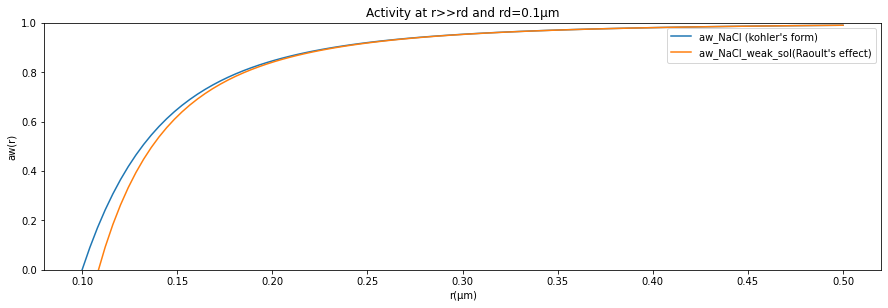

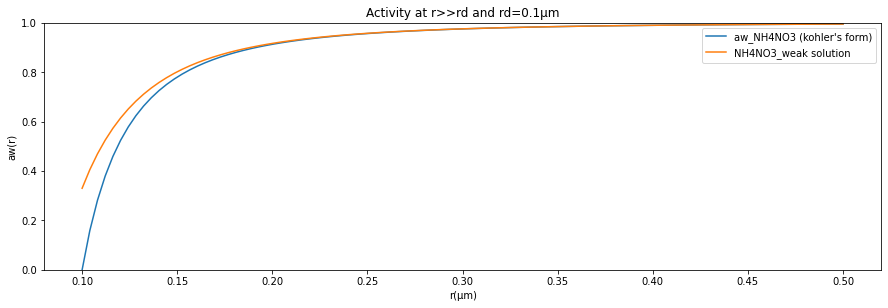

In [26]:
rmax3=0.5
rmin3=0.1
r3=np.linspace(rmin3,rmax3,100)
#for case where rd=0.1e-6 k1=1.28 Nacl and NH4NO3 k2=0.67 and r:[ 0.1e-6 m,2e-6 m ]
rd3=0.1
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.ylim(0,1)
plt.title("Activity at r>>rd and rd=0.1\u03BCm")
plt.plot(r3,aw(r3,rd3,k1),label="aw_NaCl (kohler's form)")
plt.plot(r3,aw_weak(r3,rd3,k1),label="aw_NaCl_weak_sol(Raoult's effect)")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.legend()
plt.show()
plt.figure(figsize=(15,10))
plt.subplot(212)
plt.ylim(0,1)
plt.title("Activity at r>>rd and rd=0.1\u03BCm")
plt.plot(r3,aw(r3,rd3,k2),label="aw_NH4NO3 (kohler's form)")
plt.plot(r3,aw_weak(r3,rd3,k2),label="NH4NO3_weak solution")
plt.xlabel("r(\u03BCm)")
plt.ylabel("aw(r)")
plt.legend()
plt.show()

In [8]:
#Excercise 3 tutorial 3
T1=273.15
T2=283.15
T3=293.15
rd1=0.02e-6
rd2=0.05e-6
rd3=0.1e-6
rmini_1=0.02e-6
rmaxi_1=0.5e-6
r_1=np.linspace(rmini_1,rmaxi_1,100)
rmini_2=0.05e-6
rmaxi_2=0.5e-6
r_2=np.linspace(rmini_1,rmaxi_1,100)
rmini_3=0.1e-6
rmaxi_3=0.5e-6
r_3=np.linspace(rmini_3,rmaxi_3,100)

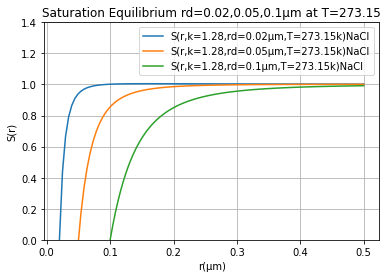

In [9]:
S_T1_rd1_Nacl=aw(r_1*1e6,rd1*1e6,k1)*s_exp(r_1,T1)
S_T1_rd2_Nacl=aw(r_2*1e6,rd2*1e6,k1)*s_exp(r_2,T1)
S_T1_rd3_Nacl=aw(r_3*1e6,rd3*1e6,k1)*s_exp(r_3,T1)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=273.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_Nacl,label= "S(r,k=1.28,rd=0.02\u03BCm,T=273.15k)NaCl")
plt.plot(r_2*1e6,S_T1_rd2_Nacl,label= "S(r,k=1.28,rd=0.05\u03BCm,T=273.15k)NaCl")
plt.plot(r_3*1e6,S_T1_rd3_Nacl,label= "S(r,k=1.28,rd=0.1\u03BCm,T=273.15k)NaCl")
plt.ylim(0,1.4)
plt.legend()

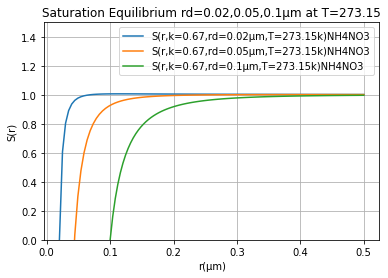

In [10]:
S_T1_rd1_NH4NO3=aw(r_1*1e6,rd1*1e6,k2)*s_exp(r_1,T1)
S_T1_rd2_NH4NO3=aw_weak(r_2*1e6,rd2*1e6,k2)*s_exp(r_2,T1)
S_T1_rd3_NH4NO3=aw(r_3*1e6,rd3*1e6,k2)*s_exp(r_3,T1)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=273.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_NH4NO3,label= "S(r,k=0.67,rd=0.02\u03BCm,T=273.15k)NH4NO3")
plt.plot(r_2*1e6,S_T1_rd2_NH4NO3,label= "S(r,k=0.67,rd=0.05\u03BCm,T=273.15k)NH4NO3")
plt.plot(r_3*1e6,S_T1_rd3_NH4NO3,label= "S(r,k=0.67,rd=0.1\u03BCm,T=273.15k)NH4NO3")
plt.ylim(0.0,1.5)
plt.legend()

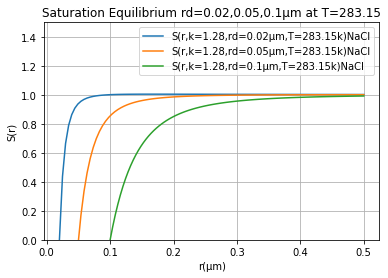

In [11]:
#Temprature T2=283.15K
S_T1_rd1_Nacl_2=aw(r_1*1e6,rd1*1e6,k1)*s_exp(r_1,T2)
S_T1_rd2_Nacl_2=aw(r_2*1e6,rd2*1e6,k1)*s_exp(r_2,T2)
S_T1_rd3_Nacl_2=aw(r_3*1e6,rd3*1e6,k1)*s_exp(r_3,T2)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=283.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_Nacl_2,label= "S(r,k=1.28,rd=0.02\u03BCm,T=283.15k)NaCl")
plt.plot(r_2*1e6,S_T1_rd2_Nacl_2,label= "S(r,k=1.28,rd=0.05\u03BCm,T=283.15k)NaCl")
plt.plot(r_3*1e6,S_T1_rd3_Nacl_2,label= "S(r,k=1.28,rd=0.1\u03BCm,T=283.15k)NaCl")
plt.ylim(0.0,1.5)
plt.legend()

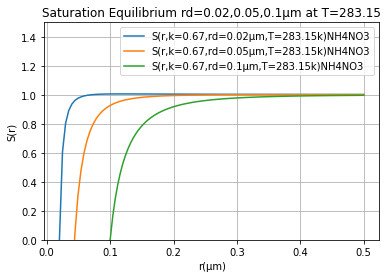

In [12]:
S_T1_rd1_NH4NO3_2=aw(r_1*1e6,rd1*1e6,k2)*s_exp(r_1,T2)
S_T1_rd2_NH4NO3_2=aw_weak(r_2*1e6,rd2*1e6,k2)*s_exp(r_2,T2)
S_T1_rd3_NH4NO3_2=aw(r_3*1e6,rd3*1e6,k2)*s_exp(r_3,T2)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=283.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_NH4NO3_2,label= "S(r,k=0.67,rd=0.02\u03BCm,T=283.15k)NH4NO3")
plt.plot(r_2*1e6,S_T1_rd2_NH4NO3_2,label= "S(r,k=0.67,rd=0.05\u03BCm,T=283.15k)NH4NO3")
plt.plot(r_3*1e6,S_T1_rd3_NH4NO3_2,label= "S(r,k=0.67,rd=0.1\u03BCm,T=283.15k)NH4NO3")
plt.ylim(0.0,1.5)
plt.legend()

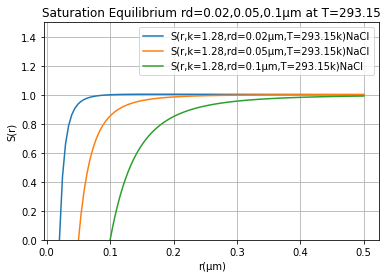

In [13]:
#Temprature T3=293.15K
S_T1_rd1_Nacl_3=aw(r_1*1e6,rd1*1e6,k1)*s_exp(r_1,T3)
S_T1_rd2_Nacl_3=aw(r_2*1e6,rd2*1e6,k1)*s_exp(r_2,T3)
S_T1_rd3_Nacl_3=aw(r_3*1e6,rd3*1e6,k1)*s_exp(r_3,T3)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=293.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_Nacl_3,label= "S(r,k=1.28,rd=0.02\u03BCm,T=293.15k)NaCl")
plt.plot(r_2*1e6,S_T1_rd2_Nacl_3,label= "S(r,k=1.28,rd=0.05\u03BCm,T=293.15k)NaCl")
plt.plot(r_3*1e6,S_T1_rd3_Nacl_3,label= "S(r,k=1.28,rd=0.1\u03BCm,T=293.15k)NaCl")
plt.ylim(0.0,1.5)
plt.legend()

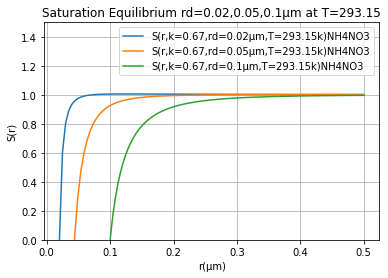

In [14]:
S_T1_rd1_NH4NO3_3=aw(r_1*1e6,rd1*1e6,k2)*s_exp(r_1,T3)
S_T1_rd2_NH4NO3_3=aw_weak(r_2*1e6,rd2*1e6,k2)*s_exp(r_2,T3)
S_T1_rd3_NH4NO3_3=aw(r_3*1e6,rd3*1e6,k2)*s_exp(r_3,T3)
plt.title("Saturation Equilibrium rd=0.02,0.05,0.1\u03BCm at T=293.15")
plt.xlabel("r(\u03BCm)")
plt.ylabel("S(r)")
plt.grid()
plt.plot(r_1*1e6,S_T1_rd1_NH4NO3_3,label= "S(r,k=0.67,rd=0.02\u03BCm,T=293.15k)NH4NO3")
plt.plot(r_2*1e6,S_T1_rd2_NH4NO3_3,label= "S(r,k=0.67,rd=0.05\u03BCm,T=293.15k)NH4NO3")
plt.plot(r_3*1e6,S_T1_rd3_NH4NO3_3,label= "S(r,k=0.67,rd=0.1\u03BCm,T=293.15k)NH4NO3")
plt.ylim(0.0,1.5)
plt.legend()